In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Image_Height:  1000
Image_Weight:  2000


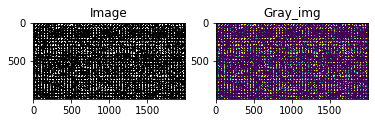

In [2]:
img = cv2.imread('digits.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1,2,2)
plt.imshow(gray_img)
plt.title('Gray_img')
image_height, image_width = img.shape[0], img.shape[1]
print("Image_Height: ",image_height)
print("Image_Weight: ",image_width)

In [3]:
resized = cv2.pyrDown(gray_img)
new_height = resized.shape[0]
new_width = resized.shape[1]
print("Image_Height: ",new_height)
print("Image_Width: ",new_width)

Image_Height:  500
Image_Width:  1000


In [4]:
arr = [np.hsplit(sp,100) for sp in np.vsplit(gray_img,50)]
arr = np.array(arr)
print(arr.shape)

(50, 100, 20, 20)


Training data shape:  (3500, 400)
Test data shape:  (1500, 400)


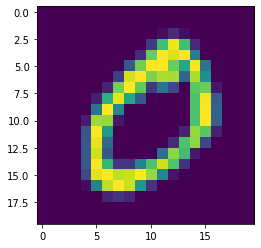

In [5]:
x_train = arr[:,:70].reshape(-1,400).astype(np.float32)
x_test = arr[:,70:].reshape(-1,400).astype(np.float32)
print("Training data shape: ",x_train.shape)
print("Test data shape: ",x_test.shape)
test_image = x_train[0]
test_image = test_image.reshape(20,20)
plt.imshow(test_image)

In [6]:
labels = np.arange(10)
print(labels)
y_train = np.repeat(labels,350)
y_train = y_train.reshape(y_train.shape[0],1)
y_test = np.repeat(labels,150)
y_test = y_test.reshape(y_test.shape[0],1)
print("Training labels shape: ", y_train.shape)
print("Test labels shape: ",y_test.shape)

[0 1 2 3 4 5 6 7 8 9]
Training labels shape:  (3500, 1)
Test labels shape:  (1500, 1)


In [7]:
clf_knn = cv2.ml.KNearest_create()
clf_knn.train(x_train,cv2.ml.ROW_SAMPLE,y_train)
_,y_pred,_,_ = clf_knn.findNearest(x_test,k=5)

In [8]:
correct = 0
for i in range(len(y_test)):
    if(y_pred[i]==y_test[i]):
        correct += 1
        
accuracy = 100.0*(correct/len(y_pred))
print("Accuracy: ",accuracy)

Accuracy:  93.13333333333334


Text(0.5, 1.0, 'Gray_text')

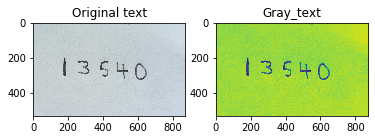

In [9]:
text = cv2.imread('text.jpg')
plt.imshow(text)
gray_text = cv2.cvtColor(text,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(text)
plt.title("Original text")
plt.subplot(1,2,2)
plt.imshow(gray_text)
plt.title("Gray_text")

Text(0.5, 1.0, 'Canny_text')

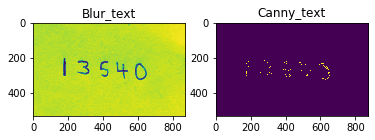

In [10]:
blur_text = cv2.GaussianBlur(gray_text,(5,5),0)
canny_text = cv2.Canny(blur_text,30,150)
plt.subplot(1,2,1)
plt.imshow(blur_text)
plt.title("Blur_text")
plt.subplot(1,2,2)
plt.imshow(canny_text)
plt.title("Canny_text")

In [11]:
contours, _ = cv2.findContours(canny_text.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print(contours[0])

9
[[[300 288]]

 [[299 289]]

 [[298 289]]

 [[299 289]]

 [[300 288]]

 [[302 290]]

 [[303 289]]

 [[305 289]]

 [[301 289]]]


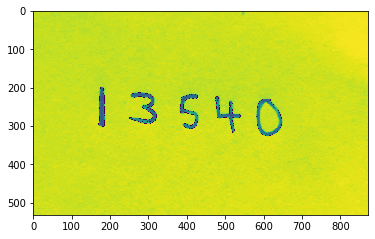

In [12]:
cv2.drawContours(blur_text,contours,-1,(0,0,255),1)
plt.imshow(blur_text)

In [13]:
def contour_coordinate(contour):
    if cv2.contourArea(contour)>30:
        M = cv2.moments(contour)
        return (int(M['m10']/M['m00']))

In [14]:
for i in range(len(contours)):
    m = contour_coordinate(contours[i])
    print(m)

None
None
None
514
612
None
405
298
179


In [15]:
new_contours = []
for i in range(len(contours)):
    if contour_coordinate(contours[i]) is not None:
        new_contours.append(contours[i])

new_contours = sorted(new_contours,key=contour_coordinate,reverse=False)        
print(len(new_contours))

5


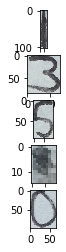

In [18]:
for i in range(len(new_contours)):
    x,y,w,h = cv2.boundingRect(new_contours[i])
    area = text[y:y+h,x:x+w]
    plt.subplot(5,1,i+1)
    plt.imshow(area)

In [86]:
def square(image):
    b = [0,0,0]
    height,width = image.shape[0], image.shape[1]
    square = None
    if height==width:
        square = image
    else:
        height,width = height*2,width*2
        new_img = cv2.resize(image,(width,height),interpolation=cv2.INTER_CUBIC)
        if (width>height):
            pad = (width-height)//2              
            new_img1 = cv2.copyMakeBorder(new_img,pad,pad,0,0,cv2.BORDER_CONSTANT,value=b)
        
        else:
            pad = (height-width)//2
            new_img1 = cv2.copyMakeBorder(new_img,0,0,pad,pad,cv2.BORDER_CONSTANT,value=b)
        
        square = new_img1
    return square

def resize(image, dim):
    resized = cv2.resize(image,(dim,dim), interpolation = cv2.INTER_AREA)
    return resized

1
3
4
9
0


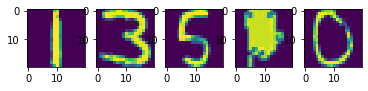

In [94]:
predictions = []
for i in range(len(new_contours)):
    x,y,w,h = cv2.boundingRect(new_contours[i])
    area = blur_text[y:y+h,x:x+w]
    _,area = cv2.threshold(area,127,225,cv2.THRESH_BINARY_INV)
    test = square(area)
    test = resize(test,20)
    plt.subplot(1,5,i+1)
    plt.imshow(test)
    test = test.reshape(1,400).astype(np.float32)
    _,pred,_,_ = clf_knn.findNearest(test,k=5)
    n = str(int(float(pred)))
    predictions.append(n)

for pred in predictions:
    print(pred)